In [1]:
# [0]
# import Libs
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

import helper

# Preparing dataset

In [2]:
# Display our data
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./input/ratings.csv
./input/movies.csv


In [3]:
# [1]
# Import the Movies dataset
movies = pd.read_csv('./input/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# [sub_1]
# Displaying movie's info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [5]:
# [2]
# Import the ratings dataset
ratings = pd.read_csv('./input/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
# [sub_2]
# Displaying movie's info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
# [3]
# Record for each table
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


# Let's start 

Kiểm tra thể loại (genres) yêu thích trên 1 nhóm nhỏ users

In [8]:
movies.genres

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9120                        Adventure|Drama|Romance
9121                Action|Adventure|Fantasy|Sci-Fi
9122                                    Documentary
9123                                         Comedy
9124                                    Documentary
Name: genres, Length: 9125, dtype: object

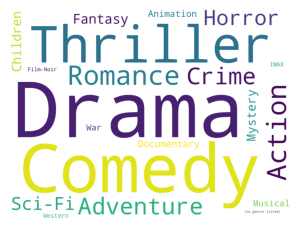

In [9]:
# [4]

# lấy mảng các thể loại và đếm lần thể loại xuất hiện
genres_dataset, genres_dataset_test = [], []
for gen in movies.genres:
    tmp = gen.split("|")
    for g in tmp:
        if g and g not in genres_dataset:
            genres_dataset.append(g)
            genres_dataset_test.append([g, 1])
            
        else:
            genres_dataset_test[genres_dataset.index(g)][1] += 1
            
# Sắp xếp lại dựa theo tổng số lần xuất hiện của thể loại đó trong tập dữ liệu
genres_dataset_test = sorted(genres_dataset_test, key=lambda genres_dataset_test: genres_dataset_test[1], reverse=True)
helper.multi_wordcloud(genres_dataset_test, filename='genres_wordcloud.png')

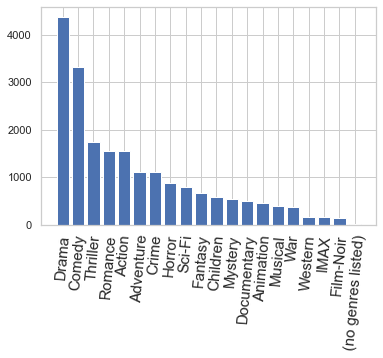

In [10]:
# [5]
# Số lượng phim của từng thể loại khác nhau
helper.multi_bar(genres_dataset_test, filename='genres_bar.png')

In [11]:
# [6]
# Hiển thị số dòng (records) của từng table
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')


The dataset contains:  100004  ratings of  9125  movies.


## Romance & SciFi

Try using subset of users, and seeing what their preferred genres are.

In [12]:
# [7]

# Calculate the average rating of ['Romance', 'Comedy'] movies
# get_genre_ratings(ratings, movies, genres, column_names)
genre_ratings_columns = ['Romance', 'Sci-Fi']
genre_ratings_avg_columns = ['avg_romance_rating', 'avg_scifi_rating']

# tính lượt rating trung bình từng thể loại
genre_ratings = helper.get_genre_ratings(ratings, movies, genre_ratings_columns, genre_ratings_avg_columns)
genre_ratings.head()


,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [13]:
# [8]
# bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2)
# tính rating trung bình theo thể loại của user, ở đây sử dụng limit_1_&_2 nhằm mục đích đảm bảo dữ liệu phân cụm rõ, hạn chế trường hợp thích/không thích cả 2 thể loại
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings,genre_ratings_avg_columns, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

# Sau khi chạy dòng này thì ta thấy rằng ta có 183 user trong tập dữ liệu test, và số lượt rating của mỗi user cho từng thể loại phim 

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


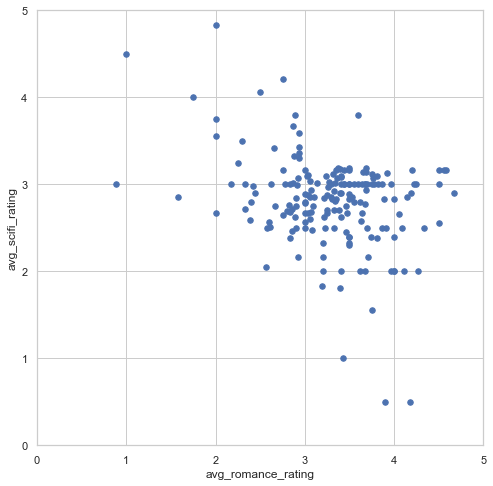

In [14]:
# [9]
# `%matplotlib inline`: hỗ trợ khi chạy ipython, câu lệnh của Jupyter Notebook để vẽ được các đồ thị bên trong cell của Jupyter Notebook
%matplotlib inline

helper.draw_scatterplot(biased_dataset[genre_ratings_avg_columns[0]], genre_ratings_avg_columns[0], biased_dataset[genre_ratings_avg_columns[1]],genre_ratings_avg_columns[1])

In [15]:
# [10]
# Let's turn our dataset into a list
X = biased_dataset[genre_ratings_avg_columns].values

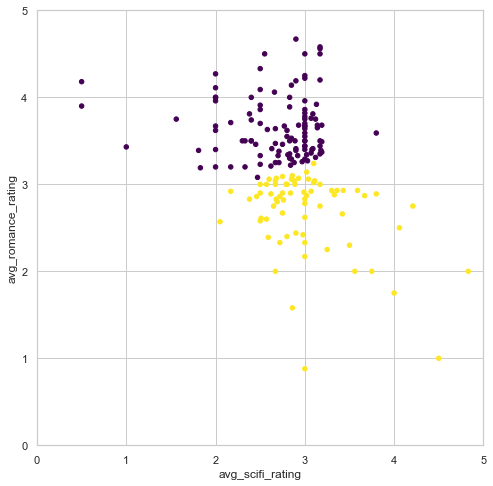

In [16]:
# [11]
# Phân cụm Kmeams với số cụm = 2

# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions, genre_ratings_avg_columns)

Như hình ta thấy hầu hết những người rating cho thể loại romance > 3 thì phụ thuộc 1 nhóm.

### Tiếp tục, thử với 3 cụm

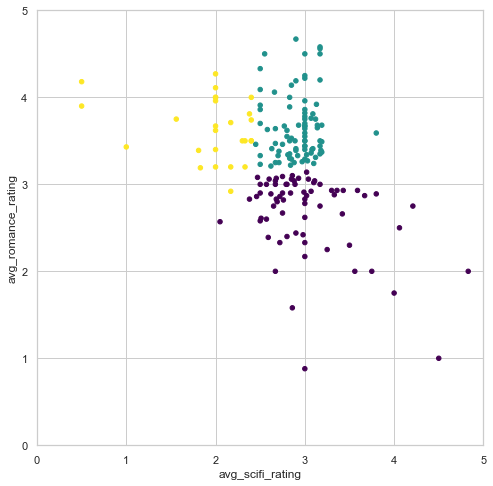

In [17]:
# [12]
# TODO: Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2, genre_ratings_avg_columns)

Hiện tại ta có 3 nhóm:
- Những người thích romance, không thích scifi (xanh)
- Những người thích scifi, không thích romance (tím)
- những người thích cả 2 (vàng)

### tiếp tục phân thành 4 cụm



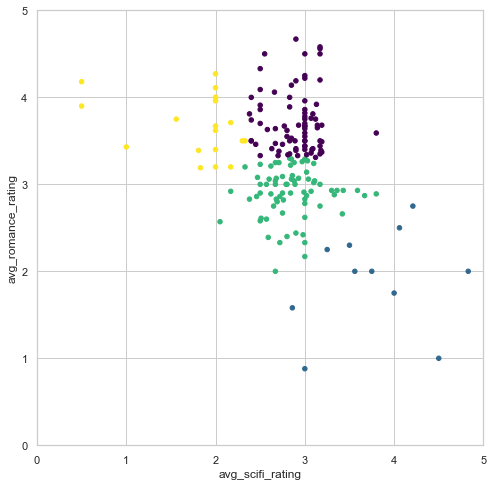

In [18]:
# [13]

# TODO: Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4, random_state=3)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3, genre_ratings_avg_columns)

Khi chia càng nhỏ tập dữ liệu ra, thì ta thấy những người cùng sở thích sẽ ở chung 1 cụm 

## Tìm K

Tìm K bằng cách sử dụng `the elbow method` (phương pháp khuỷ tay), nó hoạt động bằng cách vẽ biểu đồ có giá trị tăng dần của k so với tổng sai số được tính dựa trên K đó.


Cách tính chi tiết xem thêm `clustering_errors` trong file `helper`


In [19]:
# [14]
# Chọn range of k values để test, để đảm bảo hiệu xuất thay vì và lập qua từng k, thì chúng ta có thể sử dụng bước nhảy 5
possible_k_values = range(2, len(X)+1, 5)

# Tính giá trị lỗi cho tất cả k cần xét
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]


In [20]:
# [15]
# Optional: tìm các giá trị của K va silhouette khi chạy trên Kmeans với giá trị K
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (7, 0.3806061536495477),
 (12, 0.33519990443827813),
 (17, 0.37007528568238385),
 (22, 0.3654264097400849),
 (27, 0.3498550264412838),
 (32, 0.35625988450089613),
 (37, 0.37778109101022467),
 (42, 0.3814958004976026),
 (47, 0.3930690245450484),
 (52, 0.3606369272428701),
 (57, 0.3550959431448463),
 (62, 0.35674389107382193),
 (67, 0.35607436078959354),
 (72, 0.34673093283343615),
 (77, 0.3586822598657226),
 (82, 0.3297635309574083),
 (87, 0.32477946423958864),
 (92, 0.324355522762528),
 (97, 0.31517492295743615),
 (102, 0.3047668310378041),
 (107, 0.3012692800880265),
 (112, 0.29227135425196765),
 (117, 0.28367424953797055),
 (122, 0.2621087810911879),
 (127, 0.25108319483759717),
 (132, 0.252147270065919),
 (137, 0.23333712049357652),
 (142, 0.21618373023534154),
 (147, 0.2124470582859976),
 (152, 0.1872285628366533),
 (157, 0.1625140776040987),
 (162, 0.14759705165910098),
 (167, 0.1326053918429335),
 (172, 0.09686500587094647),
 (177, 0.06423012016322224),

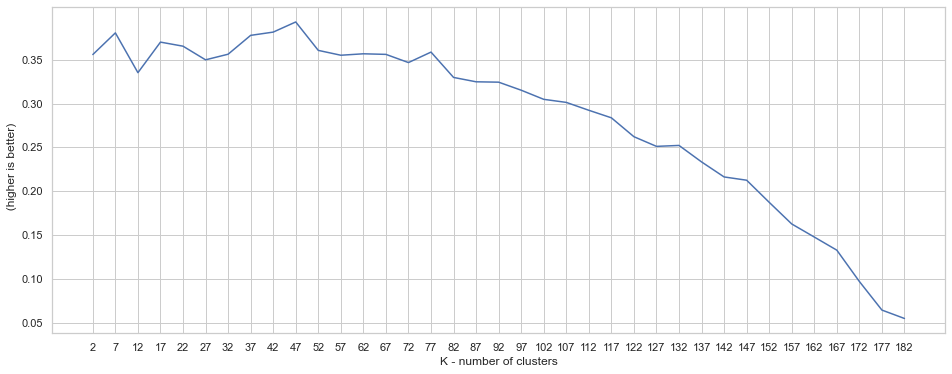

In [21]:
# [17]
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('  (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Nhìn vào graph thì ta thấy ta có các lựa chọn K với các giá trị [7,17,32,47] 


Tuy nhiên nếu sử dụng K quá lớn, có thể gây ra các cụm vô nghĩa, vì vậy, ở đây tôi chọn K=7 để tiến hành visualize

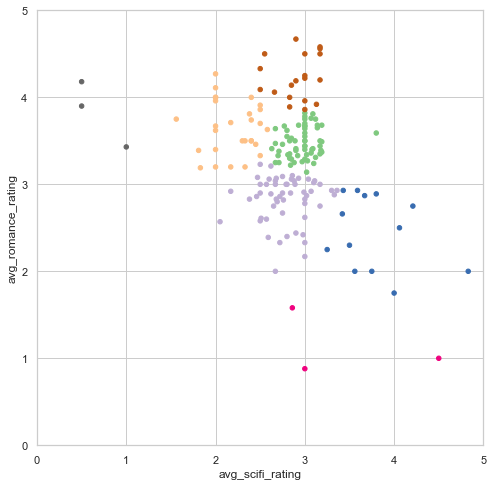

In [22]:
# [18]
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7, random_state=6)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4,genre_ratings_avg_columns, cmap='Accent')

Note: Cầm đảm bảo màu giữa các phân cụm không bị trùng lặp nhau 

---
#### Thử kiểm tra khi thêm 1 thể loại `Action` vào dataset


In [23]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies,
                                                     ['Romance', 'Sci-Fi', 'Action'],
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres,genre_ratings_avg_columns, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [24]:
# [20]
X_with_action = biased_dataset_3_genres[['avg_scifi_rating','avg_romance_rating','avg_action_rating']].values

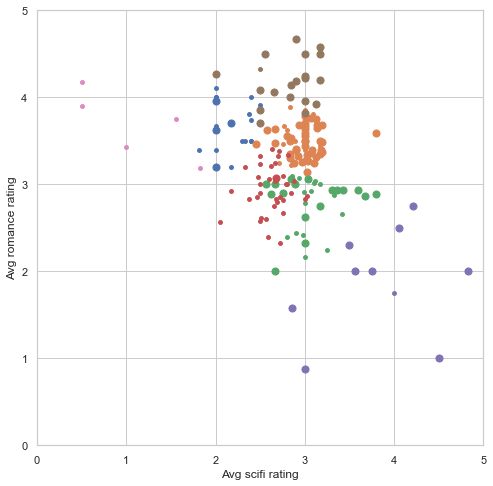

In [25]:
# [21]
# TODO: Create an instance of KMeans to find 7 clusters
kmeans_5 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)


- Lúc này trục toạ độ X và Y không có sự thay đổi, tuy nhiên lúc này có sự thay đổi về kích thước các point
- `action` rating nào có avg_rating > 3 => kích thước sẽ lớn hơn, và ngược lại.

- Tuy thế, thực sự kết quả trên gây nhiễu rất nhiều cho việc phân tích cụm


----

# NEXT
## Movie-level Clustering
Tạo ra dataset hiển thị lượt avg rating của mỗi user với từng phim

In [26]:
# [22]
# Merge the two tables then pivot so we have `Users X Movies` dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10] # iloc(:y_records, :x_records)

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


Như ta thấy hầu hết các giá trị đều là `NaN`, chỉ có một ít ô là có giá trị. Đây được gọi là tập dữ liệu thưa thớt (spare dataset).

Để thấy dữ liệu rõ ràng hơn, giờ ta thử sắp xếp các giá trị rating giảm dần, ta được kết qủa như sau:


In [27]:
# [23]

n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


5 rows × 30 columns

Ổn rồi, hầu như các dữ liệu đều được điền khá đủ, tiến hành visualize dữ liệu dưới dạng headmap 


Tạo headmap với các màu sắc thể hiện mức độ xếp hạng của user đối với phim

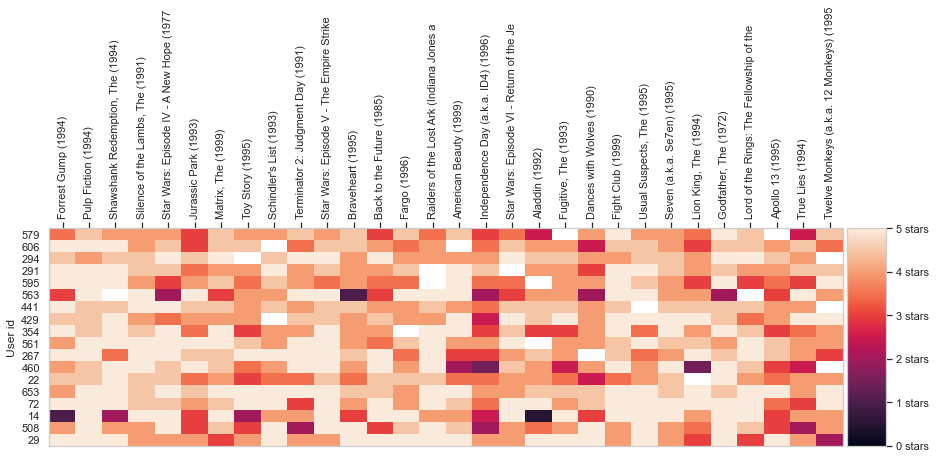

In [28]:
# [24]
helper.draw_movies_heatmap(most_rated_movies_users_selection)


- Column: movie
- Row: user 
- Color of the cell is how the user rated that movie 

*** màu trắng thể hiện cho dữ liệu có giá trị rỗng (NaN), tức là những phim mà user chưa từng rating trước đó ***

Các giá trị NaN này sẽ làm giảm khả tối ưu trong việc phân cụm sử dụng Kmeans


**Để chạy nhanh hơn, ở đây mình sẽ chay thử trên tập dữ 1000 records được lấy ra từ tập dữ liệu 9000+ records bên trên **

In [29]:
# [25]
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)
most_rated_movies_1k


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,4.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,5.0,5.0,NaN,NaN,4.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:

# most_rated_movies_1k = most_rated_movies_1k.replace(np.nan, 0)
# most_rated_movies_1k = most_rated_movies_1k.fillna(most_rated_movies_1k.mean())

Để chạy kmeans bằng thư viện sklearn với dataset có các dữ liệu `NaN` như vậy, thì ta cần chuyển nó về dạng ma trận thư thớt `sparse csr matrix` bằng cách sử dụng thư viẹn `SciPi`


`most_rated_movies_1k` đang là kiểu dữ liệu pandas dataframe, để chuyển về dạng sparse matrix, ta cần chuyển về dạng sparseDataFrame, ở đây tôi sử dụng `SparseDtype('float',NaN)` để chuyển đổi các dữ liệu NaN:float64. 

Sau đó sử dụng `to_coo()` mothod của pandas để chuyển đổi


In [31]:
# [26]
# sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())
# sparse_arr = csr_matrix(most_rated_movies_1k)
# sdf = pd.DataFrame.sparse.from_spmatrix(sparse_arr)
# sparse_ratings = sdf.sparse.to_coo()

sdf = most_rated_movies_1k.astype(pd.SparseDtype("float", np.nan))
sparse_ratings = sdf.sparse.to_coo()



## Tiến hành phân cụm (cluster)

Với Kmeans thì cần xác định được K (số cụm cần phân cụm).
Thay vì ở trên ta phải đi tìm K, bây giờ thử với K bất kỳ, ở đây tôi lấy K=20

* Việc lấy K bất kỳ sẽ gây ra việc mất thời gian xử lý (với trường hợp nếu chọn K quá lớn)

In [32]:
sparse_ratings


<671x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 62397 stored elements in COOrdinate format>

In [33]:
# [27]
# 20 clusters

predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)


cluster # 15
# of users in cluster: 249.


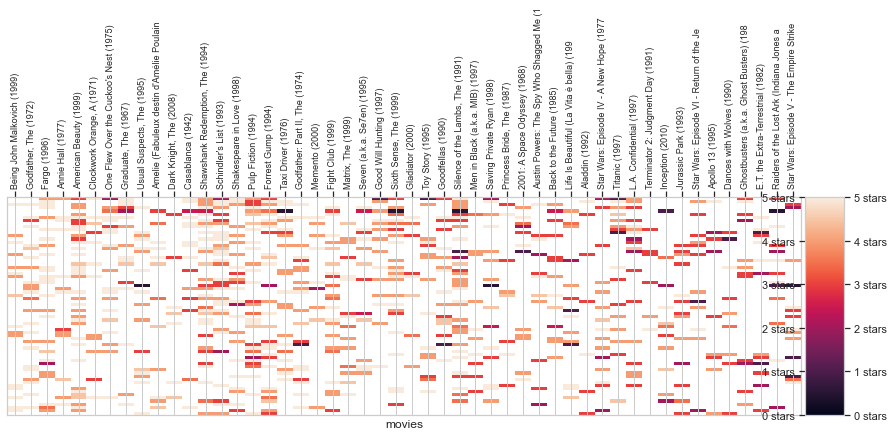

cluster # 11
# of users in cluster: 79.


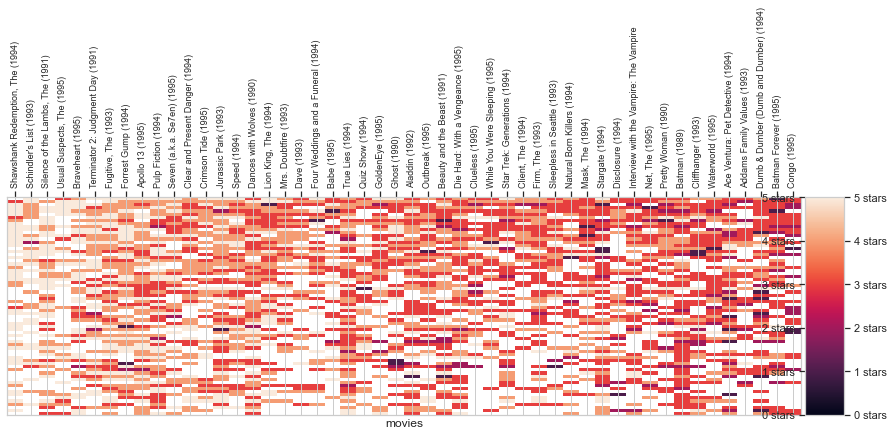

cluster # 10
# of users in cluster: 21.


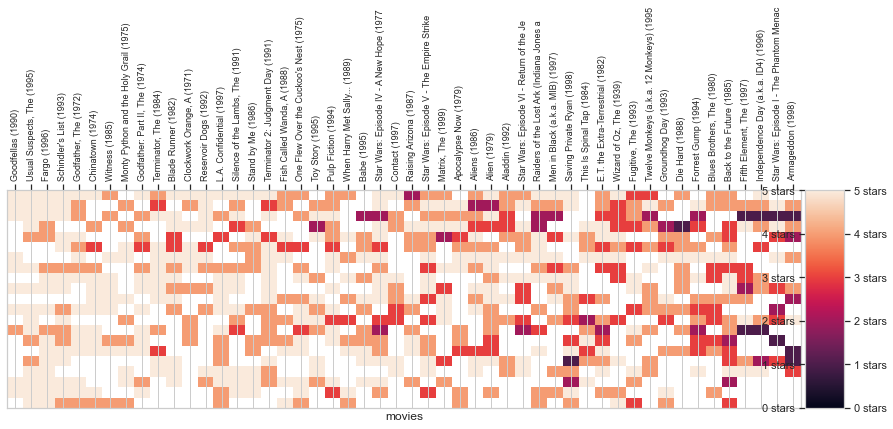

cluster # 2
# of users in cluster: 36.


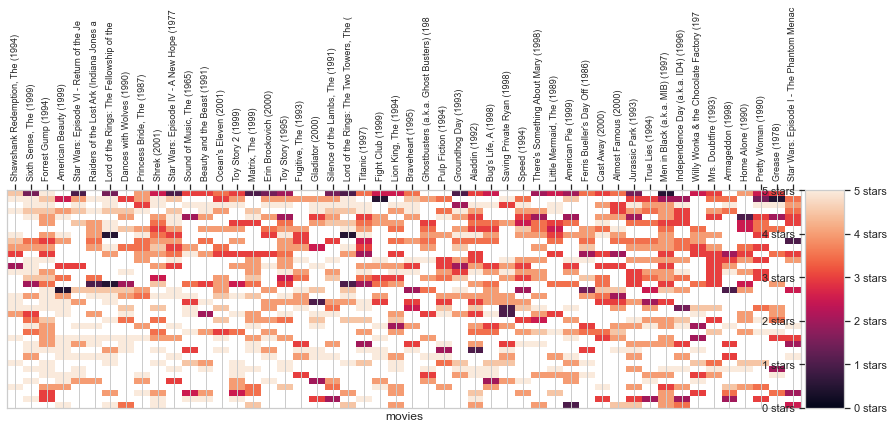

cluster # 14
# of users in cluster: 91.


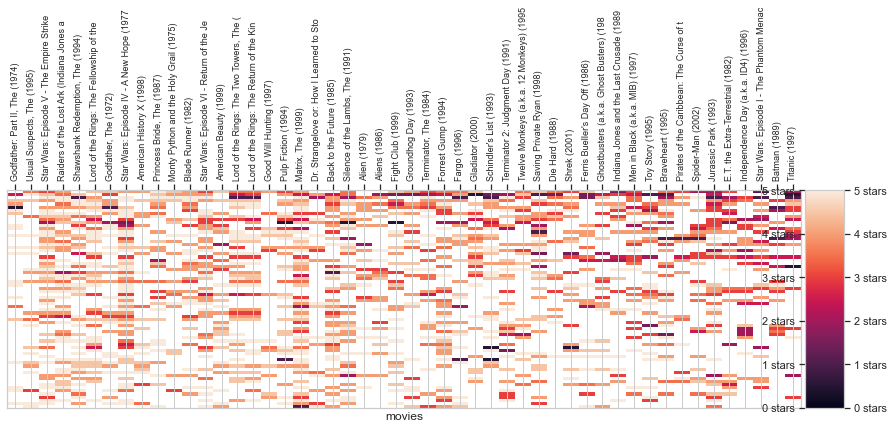

cluster # 13
# of users in cluster: 52.


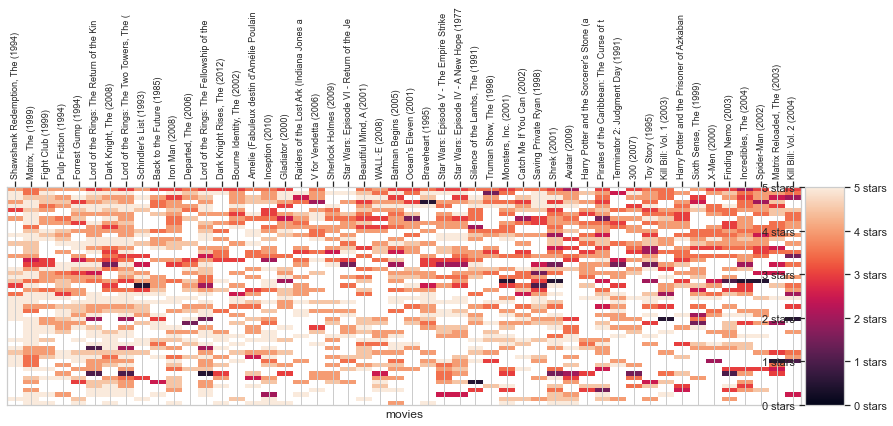

cluster # 7
# of users in cluster: 24.


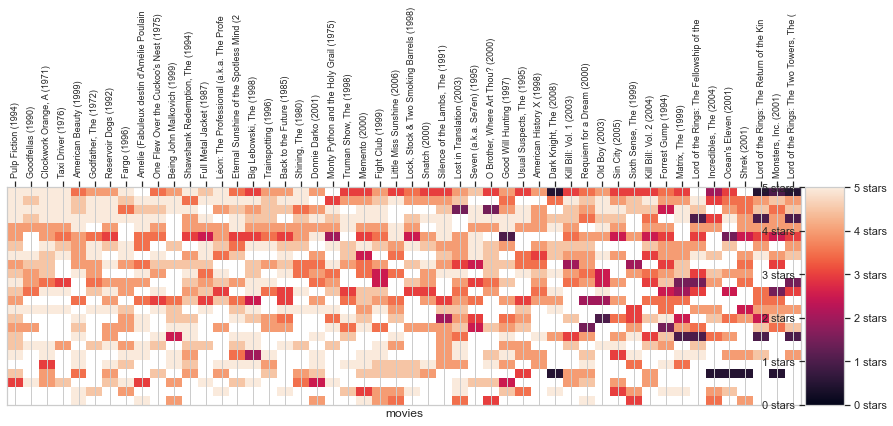

cluster # 1
# of users in cluster: 37.


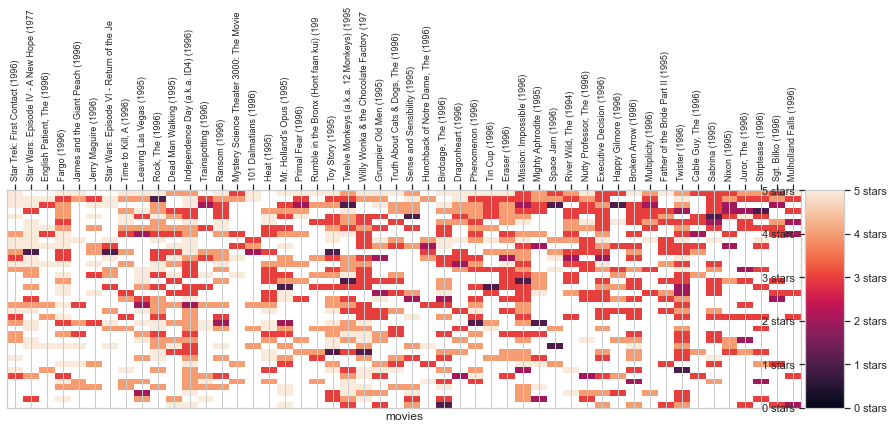

cluster # 4
# of users in cluster: 30.


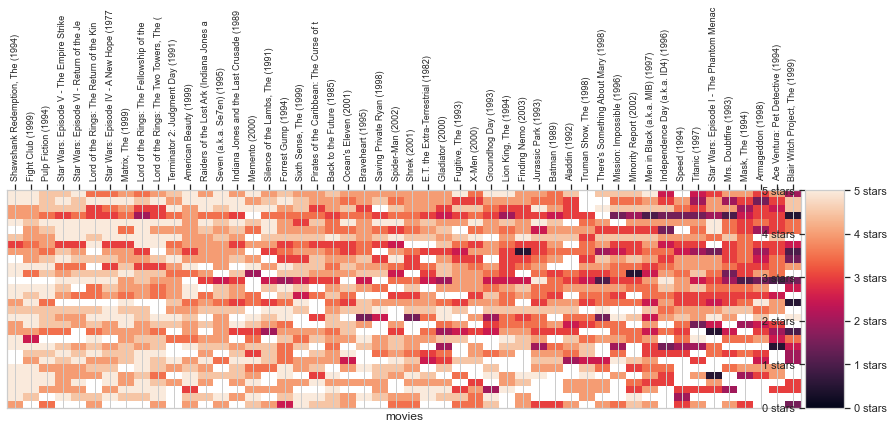

cluster # 8
# of users in cluster: 13.


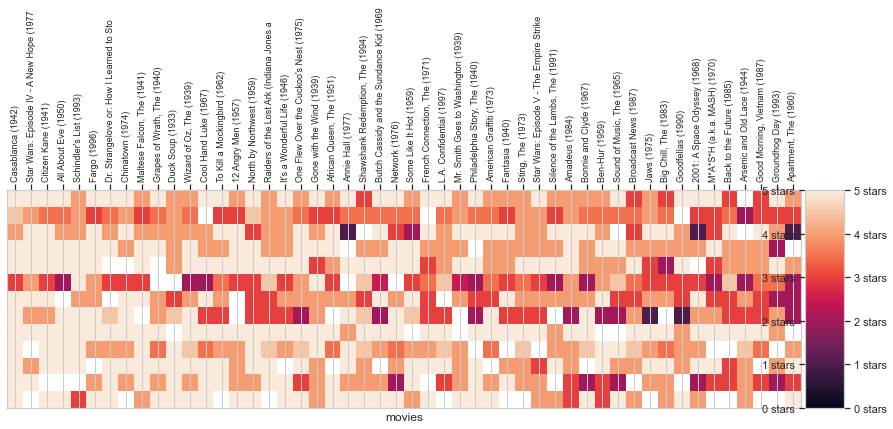

In [34]:
# [28]
max_users = 70
max_movies = 50
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

helper.draw_movie_clusters(clustered, max_users, max_movies)

Một vài kết luận qua việc phân tích rating theo user bên trên:
- Các xếp hạng trong một cụm càng giống nhau, thì màu sắc tương tự trong cụm đó nhiều [cluster # 17]
- Một số cụm thưa thớt hơn các cụm khác, chứa những người có thể xem và xếp hạng phim ít hơn các cụm khác. [cluster # 19]
- Một số cụm chủ yếu có hồng nhạt và tập hợp những người thực sự yêu thích một nhóm phim nhất định. [cluster # 13]
- Các cụm khác chủ yếu có cam hoặc đỏ là nó rating 1 nhóm phim nhất định 2-3 star => họ không nghiêng hẳn về 1 thể loại nhất định [cluster # 4]


Một điều lưu ý ở đây, cách thay đổi trong mỗi cụm, biểu đồ lọc dữ liệu hiển thị những phim có xếp hạng cao và được sắp xếp giảm dần dựa trên avg_rating


Tóm lại, ở đây việc phân cụm dựa theo lượt avg_rating, nó sẽ thực sự không có ý nghĩa nhiều nếu có quá nhiều dữ liệu rỗng (NaN) - user không hoặc ít khi rating cho bộ phim mà họ xem. Và số điểm rating sẽ có ý nghĩa khác nhau đối với từng user.

Ví dụ: user A, rating cho phim Toy Story 4 sao, vì đó họ cảm thấy nhân vật hoạt hình được vẽ chưa thật sự hoàn hảo như họ mong chờ. Với user B, cũng đánh giá 4 sao, vì lý do là nôi dung phim chưa như họ mong muốn.

## Dự đoán số rating của user cho 1 phim bất kỳ  (Prediction)
Quay lại [28], và chọn bất kỳ 1 cluster, và lấy ra 1 userID


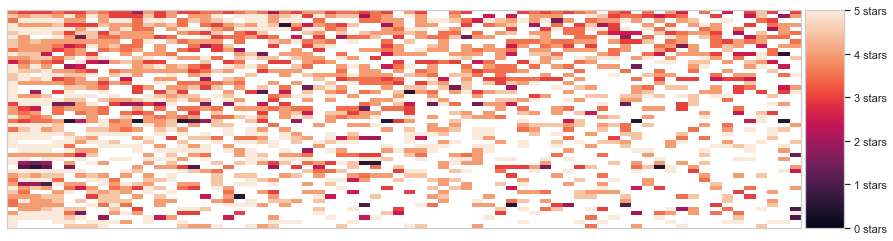

In [37]:
# [29]

# TODO: Pick a cluster ID from the clusters above
cluster_number = 13

# Let's filter to only see the region of the dataset with the most number of values 
max_users = 70
max_movies = 50
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

In [38]:
# [30]
cluster.head()


,"Matrix, The (1999)","Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Fellowship of the Ring, The (2001)","Lord of the Rings: The Return of the King, The (2003)","Dark Knight, The (2008)",Shrek (2001),Pirates of the Caribbean: The Curse of the Black Pearl (2003),Forrest Gump (1994),Inception (2010),Iron Man (2008),...,Harry Potter and the Goblet of Fire (2005),Seven (a.k.a. Se7en) (1995),Men in Black (a.k.a. MIB) (1997),"Avengers, The (2012)","Lion King, The (1994)",Jurassic Park (1993),"Godfather, The (1972)",Die Hard (1988),Independence Day (a.k.a. ID4) (1996),Little Miss Sunshine (2006)
6,3.5,3.0,3.0,3.0,3.5,3.0,3.0,4.0,3.5,3.0,...,NaN,3.5,NaN,2.5,NaN,3.0,4.5,3.0,NaN,3.0
10,4.5,4.0,4.5,4.5,4.0,5.0,3.5,5.0,4.0,3.0,...,NaN,NaN,3.0,NaN,NaN,2.5,4.5,NaN,2.0,4.0
43,3.5,5.0,5.0,5.0,5.0,4.0,4.0,NaN,4.0,5.0,...,4.5,NaN,NaN,5.0,NaN,NaN,3.5,3.0,NaN,NaN
14,5.0,4.0,4.0,4.0,4.5,3.0,3.0,3.0,4.5,4.0,...,4.0,5.0,4.0,NaN,NaN,3.0,NaN,3.5,4.0,4.0
46,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,4.0,...,NaN,3.5,4.0,NaN,3.5,NaN,NaN,2.0,4.0,NaN


Chọn một ô trống từ bảng. Nó trống vì người dùng đó không đánh giá bộ phim đó. Chúng ta có thể đoán được liệu cô ấy có muốn hay không?

Vì người dùng nằm trong nhóm người dùng có vẻ giống nhau, ta có thể lấy trung bình số phiếu bầu cho bộ phim đó trong nhóm này và đó sẽ là một dự đoán cho nhiều người

In [40]:
# [31]
# TODO: Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
# Pick a movie from the table above since we're looking at a subset
movie_name = 'Lion King, The (1994)'

cluster[movie_name].mean()

3.5789473684210527

# Recommendation

Ta k để phân cụm người dùng theo xếp hạng của họ. Điều này dẫn đến các nhóm người dùng có xếp hạng tương tự và có chung sở thích xem phim tương tự. Dựa trên điều này, khi một người dùng không có xếp hạng cho một bộ phim nhất định, dựa vào tính trung bình xếp hạng của tất cả những người dùng khác trong cụm và dự đoán về bộ phim cần giới thiệu cho user này.

Dựa trên điều này, nếu tính điểm trung bình của mỗi bộ phim trong cụm thì sẽ có thể hiểu được nhưng loại phim mà user đó thích 


In [41]:
# [32]
# Thử lấy avg_rating của 20 bộ phim để xem xét lượt rating của user trong cụm
cluster.mean().head()

Matrix, The (1999)                                           4.428571
Lord of the Rings: The Two Towers, The (2002)                4.180851
Lord of the Rings: The Fellowship of the Ring, The (2001)    4.136364
Lord of the Rings: The Return of the King, The (2003)        4.220930
Dark Knight, The (2008)                                      4.219512
dtype: float64

In [42]:
# TODO: Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 10

# Get all this user's ratings
user_test_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_test_unrated_movies =  user_test_ratings[user_test_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_test_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]



Seven (a.k.a. Se7en) (1995)                                                                       4.263158
Dark Knight Rises, The (2012)                                                                     4.130435
Avengers, The (2012)                                                                              4.105263
Sherlock Holmes (2009)                                                                            4.104167
Star Wars: Episode VI - Return of the Jedi (1983)                                                 4.100000
Inglourious Basterds (2009)                                                                       4.068182
Ocean's Eleven (2001)                                                                             4.020833
Star Wars: Episode V - The Empire Strikes Back (1980)                                             4.017241
Harry Potter and the Goblet of Fire (2005)                                                        4.000000
Monsters, Inc. (2001)                

# Content-Based

*Ý tưởng:*
- Đề xuất dựa trên xếp hạng phim
- Nếu bạn thích 1 bộ phim, thì bạn cũng sẽ thích 1 phim tương tự 
- Dữ liệu rating đó được thực hiện bởi các user 
- Nó sẽ gợi ý những bộ phim giống nhất với một bộ phim cụ thể dựa trên thể loại của nó.

- Ta  sẽ sử dụng hàm TfidfVectorizer từ scikit-learning, hàm này chuyển văn bản thành vectơ đặc trưng có thể được sử dụng làm đầu vào cho công cụ ước tính.
- Để sử dụng Cosine Similarity để tính độ tương tự 2 bộ phim, ta dùng thư viện linear_kernel
- Khi này ta sẽ có các cặp phim tương tự theo ma trận (cosine similarity matrix)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [44]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [58]:
re = genre_recommendations('Memento (2000)').head(20)


# # Join all 3 files into one dataframe
dataset = pd.merge(pd.merge(movies, ratings),re)
dataset
# # Display 20 movies with highest ratings
# dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(30)

,movieId,title,genres,userId,rating,timestamp
0,257,Just Cause (1995),Mystery|Thriller,110,4.0,840100836
1,257,Just Cause (1995),Mystery|Thriller,128,5.0,1049683504
2,257,Just Cause (1995),Mystery|Thriller,242,4.0,956686146
3,257,Just Cause (1995),Mystery|Thriller,396,4.0,842867740
4,257,Just Cause (1995),Mystery|Thriller,405,1.5,1097696965
...,...,...,...,...,...,...
344,27773,Old Boy (2003),Mystery|Thriller,610,5.0,1349428075
345,27773,Old Boy (2003),Mystery|Thriller,615,4.0,1408779998
346,27773,Old Boy (2003),Mystery|Thriller,628,5.0,1357725631
347,27773,Old Boy (2003),Mystery|Thriller,648,2.5,1147555000


# Finish!